In [13]:
import random
import cv2
import sys
import numpy as np
from scipy import ndimage as ndimage
from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec

In [14]:
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [15]:
arr = np.array([[255, 255, 255, 0, 255, 255],
                [255, 255, 255, 0, 255, 255],
                [255, 255, 255, 0, 255, 255],
                [255, 255, 255, 0, 255, 255],
                [255, 255, 255, 0, 255, 255],
                [255, 255, 255, 0, 255, 255]])

gauss = np.array([[1, 2, 1],
                  [2, 4, 2],
                  [1, 2, 1]])

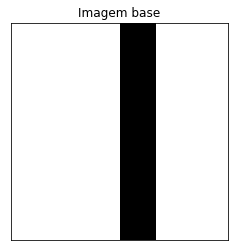

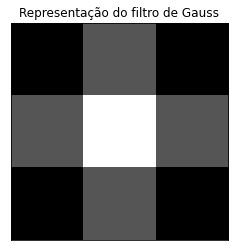

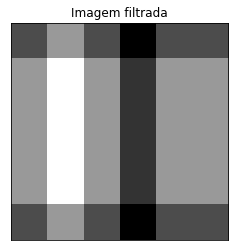

In [21]:
plt.title('Imagem base'), plt.xticks([]), plt.yticks([])
#plt.figure(figsize = (10,10))
plt.imshow(arr, cmap='gray')
plt.show()

plt.title('Representação do filtro de Gauss'), plt.xticks([]), plt.yticks([])
#plt.figure(figsize = (10,10))
plt.imshow(gauss, cmap='gray')
plt.show()

img_filtered = ndimage.filters.convolve(arr, gauss, mode='constant')
plt.title('Imagem filtrada'), plt.xticks([]), plt.yticks([])
#plt.figure(figsize = (10,10))
plt.imshow(img_filtered, cmap='gray')
plt.show()

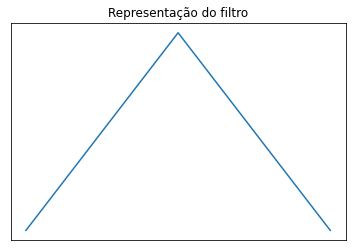

<Figure size 720x720 with 0 Axes>

In [25]:
dft = cv2.dft(np.float32(gauss), flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
sample_angles = np.linspace(0,  2 * np.pi, len(magnitude_spectrum.sum(axis=0))) / np.pi*180

fig, axs = plt.subplots(1, sharex=True, sharey=True)
plt.title('Representação do filtro'), plt.xticks([]), plt.yticks([])
plt.figure(figsize = (10,10))
axs.plot(sample_angles, magnitude_spectrum.sum(axis=0))
plt.show()